<a href="https://colab.research.google.com/github/Eben-Success/004-MNIST_Keras/blob/main/MNIST_Tutorials.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
print(tf.__version__)

2.8.2


In [2]:
# load the Fashio MNIST dataset
fmist = tf.keras.datasets.fashion_mnist

In [3]:
# Load the training and test split of the Fashion MNISt datasets
(training_images, training_labels), (test_images, test_labels) = fmist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


LABEL: 1
  
IMAGE PIXEL ARRAY: 
 [[  0   0   0   0   0   0   0   0   0  58 145 106 111  52  83 127 106 101 146  23   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  97 161 175 178 182 230 254 159 127 143  80   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 106 172 154 128 163 254 170 156 182 135  68   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 120 109 111 117 139 104 123 113 119 160 115   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 130 134 143 156 165 126 164 128  98 116 119   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 128 124 122 143 190 234 168 130 120 132 120   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 137 111 124 142 250 246 156 142 124 128 130   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 128 146 123 174 191 123 167 128 127 143 100   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 109 138 1

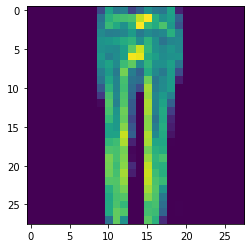

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# You can put between 0 to 59999 here
index = 456

# Set number of characters per row when printing
np.set_printoptions(linewidth=320)

# Print the label and image
print(f"LABEL: {training_labels[index]}")
print(f"  \nIMAGE PIXEL ARRAY: \n {training_images[index]}")

# Visualize the image
plt.imshow(training_images[index])

In [10]:
# Normalize the pixel values of the train and test images
training_images = training_images / 255.0
test_images = test_images / 255.0

In [14]:
# Build the classification model
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

In [ ]:
print("Hello World")